# Import libraries and code bases



In [ ]:
!git clone https://github.com/farhadnawaz/iflow.git

fatal: destination path 'iflow' already exists and is not an empty directory.


In [ ]:
cd ..

/content/iflow


In [ ]:
!git pull

Already up to date.


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install -e .

Obtaining file:///content/iflow
  Preparing metadata (setup.py) ... done
  Attempting uninstall: iflow
    Found existing installation: iflow 0.0.1
    Uninstalling iflow-0.0.1:
      Successfully uninstalled iflow-0.0.1
  Running setup.py develop for iflow


In [ ]:
cd iflow

/content/iflow/iflow


# Load dataset

In [ ]:
import os, sys
import torch
import torch.optim as optim
# from iflow.dataset import iros_dataset
from iflow.dataset import corl_mine_dataset, iros_dataset
from torch.utils.data import DataLoader
from iflow.utils import makedirs
from iflow import model
from iflow.trainers import cycle_dynamics_train
from iflow.utils.generic import to_torch
import numpy as np
from iflow.visualization import visualize_vector_field, visualize_2d_generated_trj, save_vector_field
from iflow.test_measures.log_likelihood import cycle_log_likelihood

percentage = .99
batch_size = 100
depth = 10
## optimization ##
lr = 0.0001
weight_decay = 0.
## training variables ##
nr_epochs = 3000
filename = 'IShape'
# filename = 'Wiping_loop'
# filename = 'Towel'
# filename = 'Spiral'
save_folder = 'experiments'

# dir_save = os.path.join(os.path.dirname(__file__),save_folder)
# makedirs(dir_save)

######### GPU/ CPU #############
#device = torch.device('cuda:' + str(args.gpu) if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

data = iros_dataset.IROS(filename=filename)
# data = corl_mine_dataset.CoRL(filename=filename)
# data_unorm = data.unormalize(data.train_data)


traj_all_process=np.array(data.train_data)
# traj_all_process=np.array(data_unorm)

# Metrics

In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00


In [ ]:
# !apt install cm-super
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

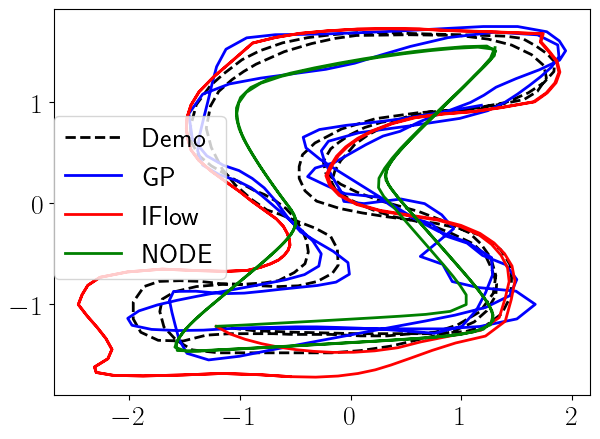

In [ ]:
# from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import plotly.graph_objects as go
import kaleido

vv = lambda x, y: jnp.vdot(x, y)

## Load data set

import os, sys
import torch
import torch.optim as optim
# from iflow.dataset import iros_dataset
# from iflow.dataset import corl_mine_dataset, iros_dataset
# from torch.utils.data import DataLoader
# from iflow.utils import makedirs
# from iflow import model
# from iflow.trainers import cycle_dynamics_train
# from iflow.utils.generic import to_torch
# import numpy as np
# from iflow.visualization import visualize_vector_field, visualize_2d_generated_trj, save_vector_field
# from iflow.test_measures.log_likelihood import cycle_log_likelihood
import numpy as np
import time

# percentage = .99
# batch_size = 100
# depth = 10
# ## optimization ##
# lr = 0.0001
# weight_decay = 0.
# ## training variables ##
# nr_epochs = 3000
# # filename = 'SShape'
# # filename = 'Wiping_loop'
# # filename = 'Towel'
# # filename = 'Spiral'
# save_folder = 'experiments'

# # dir_save = os.path.join(os.path.dirname(__file__),save_folder)
# # makedirs(dir_save)

# ######### GPU/ CPU #############
# #device = torch.device('cuda:' + str(args.gpu) if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

# # data = iros_dataset.IROS(filename=filename)
# data = corl_mine_dataset.CoRL(filename=filename)
# # data_unorm = data.unormalize(data.train_data)


# traj_all_process=np.array(data.train_data)
# # traj_all_process=np.array(data_unorm)

# ## 3D Robot demos

# # filename = 'Wiping_loop'
# # filename = 'Spiral'
# # filename = 'Towel'
# device = torch.device('cpu')

# # data = iros_dataset.IROS(filename=filename)
# data = corl_mine_dataset.CoRL(filename=filename)

# traj_all_process=np.array(data.train_data)

## 2D IROS demos

file_name = '/content/Demo_SShape.npy'

with open(file_name, 'rb') as f:
  traj_all_process = np.load(f)

file_name = '/content/NODE_SShape.npy'

with open(file_name, 'rb') as f:
  traj_target = np.load(f)

file_name = '/content/IFlow_SShape.npy'

with open(file_name, 'rb') as f:
  trj_y = np.load(f)

file_name = '/content/SShape_GMR_GP_pred.npy'

with open(file_name, 'rb') as f:
  trj_g = np.load(f)
indx = 3
start_indx = 1
trj_g_norm = ((trj_g[indx] - np.expand_dims(np.mean(trj_g[indx], axis=1), axis=1))/np.expand_dims(np.std(trj_g[indx], axis=1), axis=1))
# ## Execution time

# NODE_time = []
# IFlow_time = []

# for i in range(10):

#   file_name = '/content/SShape_my_model_better.eqx'
#   ys = traj_all_process
#   ts = np.linspace(0, data.dt*traj_all_process.shape[1], num=traj_all_process.shape[1])
#   _, length_size, data_size = ys.shape
#   width_size=128
#   depth=5
#   seed=1000
#   key = jrandom.PRNGKey(seed)
#   data_key, model_key, loader_key = jrandom.split(key, 3)
#   model1 = NeuralODE(data_size, width_size, depth, key=model_key)
#   model_load_1 = eqx.tree_deserialise_leaves(file_name, model1)

#   start_NODE = time.time()
#   traj_target = model_load_1(ts, traj_all_process[0, 0])
#   print("NODE: %s seconds ---" % (time.time() - start_NODE))
#   NODE_time.append(time.time() - start_NODE)

#   PATH = '/content/SShape_IFlow.pt'
#   dim = data.dim
#   T_period = (2*np.pi)/data.w
#   params = {'batch_size': batch_size, 'shuffle': True}
#   dataloader = DataLoader(data.dataset, **params)
#   ######### Model #########
#   depth = 20
#   lsd = model.LinearLimitCycle(dim, device, dt=data.dt, T_period=T_period)
#   flow = create_flow_seq(dim, depth)
#   iflow = model.ContinuousDynamicFlow(dynamics=lsd, model=flow, dim=dim).to(device)
#   iflow.load_state_dict(torch.load(PATH))
#   iflow.eval()

#   y_0 = torch.from_numpy(traj_all_process[0, :1, :]).float().to(device)
#   start_IFlow = time.time()
#   trj_y = iflow.generate_trj(y_0, T=traj_all_process.shape[1])
#   trj_y = trj_y.detach().cpu().numpy()
#   print("IFlow: %s seconds ---" % (time.time() - start_IFlow))
#   IFlow_time.append(time.time() - start_IFlow)


# print("IFlow avg: %s seconds ---" % (sum(IFlow_time)/10))

# print("NODE avg.: %s seconds ---" % (sum(NODE_time)/10))

# file_name = '/content/trajectory_t_spiral_loop.npy'

# with open(file_name, 'rb') as f:
#   traj_target = np.load(f)

# file_name = '/content/Spiral_IFlow_pred.npy'

# with open(file_name, 'rb') as f:
#   trj_y = np.load(f)

# distance_IFlow, path = fastdtw(trj_y[:, :3], traj_all_process[0, :, :3], dist=euclidean)

# distance_NODE, path = fastdtw(traj_target[:, :3], traj_all_process[0, :, :3], dist=euclidean)

# print("DTWD \nIFlow: %0.4f, NODE: %0.4f" % (distance_IFlow, distance_NODE))

## 2D IROS trajectories

import matplotlib
import matplotlib.pyplot as plt

font = {'size': 20}
matplotlib.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

length = 1

indx = 0
# traj_d_all = traj_spirals_d_all
plt.plot(traj_all_process[indx, :int(length*traj_all_process.shape[1]), 0], traj_all_process[indx, :int(length*traj_all_process.shape[1]), 1], label="Demo", linewidth=2, linestyle='--', color='black')

plt.plot(trj_g_norm[0, start_indx:], trj_g_norm[1, start_indx:], label="GP", linewidth=2, color='blue')
plt.plot(trj_y[:,0], trj_y[:,1], label="IFlow", linewidth=2, color='red')
plt.plot(traj_target[:,0], traj_target[:,1], label="NODE", linewidth=2, color='green')
# plt.plot(trj_g_norm[0,start_indx], trj_g_norm[1,start_indx], 'o', color='saddlebrown')
plt.legend(loc=[0, 0.3])
plt.tight_layout()

## 3D Robot trajectories
# fig = go.Figure()
# i=0
# fig.add_trace(go.Scatter3d(x=traj_all_process[i, :, 0], y=traj_all_process[i, :, 1], z=traj_all_process[i, :, 2], mode='lines', line=dict(color='black', dash='dashdot', width=6), name='Demo'))
# fig.add_trace(go.Scatter3d(x=trj_y[:, 0], y=trj_y[:, 1], z=trj_y[:, 2], mode='lines', line=dict(color='red', width=6), name='IFlow'))
# fig.add_trace(go.Scatter3d(x=traj_target[:, 0], y=traj_target[:, 1], z=traj_target[:, 2], mode='lines', line=dict(color='green', width=6), name='NODE'))
# fig.add_trace(go.Scatter3d(x=np.array(traj_all_process[i, start, 0]), y=np.array(traj_all_process[i, start, 1]), z=np.array(traj_all_process[i, start, 2]), marker=dict(size=10, color=1, colorscale='Turbo'), name='Start'))
# fig.add_trace(go.Scatter3d(x=np.array(traj_all_process[i, -1, 0]), y=np.array(traj_all_process[i, -1, 1]), z=np.array(traj_all_process[i, -1, 2]), marker=dict(size=10, color=0.5, colorscale='Turbo'), name='End'))

# fig.update_layout(
#     font_family="Times New Roman",
#     font_size = 18,
#     legend_font_size = 64,
# )

# fig.show()

# fig.write_html('Spiral_IFlow_compare.html')

# Train LASA dataset

In [ ]:
import os, sys, time
import torch
import torch.optim as optim
from iflow.dataset import lasa_dataset
from torch.utils.data import DataLoader
from iflow import model
from iflow.trainers import goto_dynamics_train
from iflow.utils import to_numpy, to_torch
from iflow.visualization import visualize_latent_distribution, visualize_vector_field, visualize_2d_generated_trj
from iflow.test_measures import log_likelihood, iros_evaluation


percentage = .99
batch_size = 100
depth = 10
## optimization ##
lr = 0.001
weight_decay = 0.
## training variables ##
nr_epochs = 1000
## filename ##
filename = 'Sine'

######### GPU/ CPU #############
#device = torch.device('cuda:' + str(0) if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

#### Invertible Flow model #####
def main_layer(dim):
    return  model.CouplingLayer(dim)


def create_flow_seq(dim, depth):
    chain = []
    for i in range(depth):
        chain.append(main_layer(dim))
        chain.append(model.RandomPermutation(dim))
        chain.append(model.LULinear(dim))
    chain.append(main_layer(dim))
    return model.SequentialFlow(chain)


if __name__ == '__main__':
    ########## Data Loading #########
    data = lasa_dataset.LASA(filename = filename)
    dim = data.dim
    params = {'batch_size': batch_size, 'shuffle': True}
    dataloader = DataLoader(data.dataset, **params)
    ######### Model #########
    dynamics = model.TanhStochasticDynamics(dim, dt=0.01, T_to_stable=2.5)
    #dynamics = model.LinearStochasticDynamics(dim, dt=0.01, T_to_stable=2.5)
    flow = create_flow_seq(dim, depth)
    iflow = model.ContinuousDynamicFlow(dynamics=dynamics, model=flow, dim=dim).to(device)
    ########## Optimization ################
    params = list(flow.parameters()) + list(dynamics.parameters())
    optimizer = optim.Adamax(params, lr = lr, weight_decay= weight_decay)
    #######################################
    for i in range(nr_epochs):
        ## Training ##
        for local_x, local_y in dataloader:
            dataloader.dataset.set_step()
            optimizer.zero_grad()
            loss = goto_dynamics_train(iflow, local_x, local_y)
            loss.backward(retain_graph=True)
            optimizer.step()

        ## Validation ##
        if i%10 == 0:
            with torch.no_grad():
                iflow.eval()

                # visualize_2d_generated_trj(data.train_data, iflow, device, fig_number=2)
                # visualize_latent_distribution(data.train_data, iflow, device, fig_number=1)
                # visualize_vector_field(data.train_data, iflow, device, fig_number=3)
                iros_evaluation(data.train_data, iflow, device)

                ## Prepare Data ##
                step = 20
                trj = data.train_data[0]
                trj_x0 = to_torch(trj[:-step,:], device)
                trj_x1 = to_torch(trj[step:,:], device)
                log_likelihood(trj_x0, trj_x1, step, iflow, device)
                print('The Variance of the latent dynamics are: {}'.format(torch.exp(iflow.dynamics.log_var)))
                print('The Velocity of the latent dynamics are: {}'.format(iflow.dynamics.Kv[0,0]))

# Train my dataset

In [ ]:
import os, sys
import torch
import torch.optim as optim
from iflow.dataset import corl_mine_dataset
from torch.utils.data import DataLoader
from iflow.utils import makedirs
from iflow import model
from iflow.trainers import cycle_dynamics_train
from iflow.utils.generic import to_torch
import numpy as np
from iflow.visualization import visualize_vector_field, visualize_2d_generated_trj, save_vector_field
from iflow.test_measures.log_likelihood import cycle_log_likelihood
import time


percentage = .99
batch_size = 100
depth = 10
## optimization ##
lr = 0.001
weight_decay = 0.
## training variables ##
nr_epochs = 5000
save_folder = 'experiments'

# dir_save = os.path.join(os.path.dirname(__file__),save_folder)
# makedirs(dir_save)

######### GPU/ CPU #############
#device = torch.device('cuda:' + str(args.gpu) if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

#### Invertible Flow model #####
def main_layer(dim):
    return  model.ResNetCouplingLayer(dim)


def create_flow_seq(dim, depth):
    chain = []
    for i in range(depth):
        chain.append(main_layer(dim))
        chain.append(model.RandomPermutation(dim))
        chain.append(model.LULinear(dim))
    chain.append(main_layer(dim))
    return model.SequentialFlow(chain)


if __name__ == '__main__':
    ########## Data Loading #########
    data = corl_mine_dataset.CoRL(filename=filename)
    dim = data.dim
    T_period = (2*np.pi)/data.w
    params = {'batch_size': batch_size, 'shuffle': True}
    dataloader = DataLoader(data.dataset, **params)
    ######### Model #########
    lsd = model.LinearLimitCycle(dim, device, dt=data.dt, T_period=T_period)
    flow = create_flow_seq(dim, depth)
    iflow = model.ContinuousDynamicFlow(dynamics=lsd, model=flow, dim=dim).to(device)
    ########## Optimization ################
    params = list(flow.parameters()) + list(lsd.parameters())
    optimizer = optim.Adamax(params, lr = lr, weight_decay= weight_decay)
    #######################################
    start_time = time.time()
    for i in range(nr_epochs):
        # Training
        for local_x, local_y in dataloader:
            dataloader.dataset.set_step()
            optimizer.zero_grad()
            loss = cycle_dynamics_train(iflow, local_x, local_y)
            loss.backward(retain_graph=True)
            optimizer.step()

        ## Validation ##
        if i%100 == 0:
            with torch.no_grad():
                iflow.eval()

                #visualize_2d_generated_trj(data.train_data, iflow, device, fig_number=2)
                #visualize_vector_field(data.train_data, iflow, device, fig_number=3)

                step = 20
                trj = data.train_data[0]
                trj_x0 = to_torch(trj[:-step,:], device)
                trj_x1 = to_torch(trj[step:,:], device)
                phase = to_torch(data.train_phase_data[0][:-step], device)
                cycle_log_likelihood(trj_x0, trj_x1, phase, step, iflow, device)

                fig_name = filename + str(i) + '.png'
                # save_filename = os.path.join(dir_save, fig_name)
                # save_vector_field(data.train_data, iflow, device, save_fig=save_filename)
print("--- %s seconds ---" % (time.time() - start_time))

Validation data Conditional Log Likelihood : -252.50514221191406 | log pz : -252.21914672851562 | log detJ : -0.28598153591156006
Validation data Stable Log Likelihood : -1.8947882652282715 | log pz : -1.6088080406188965 | log detJ : -0.28598031401634216
Validation data Conditional Log Likelihood : -12.213665962219238 | log pz : -16.336214065551758 | log detJ : 4.122549057006836
Validation data Stable Log Likelihood : 4.569182395935059 | log pz : 0.4467518627643585 | log detJ : 4.122430801391602
Validation data Conditional Log Likelihood : -4.9775872230529785 | log pz : -11.163778305053711 | log detJ : 6.186191082000732
Validation data Stable Log Likelihood : 6.66575288772583 | log pz : 0.4796724021434784 | log detJ : 6.186079978942871
Validation data Conditional Log Likelihood : 0.09894094616174698 | log pz : -7.042416572570801 | log detJ : 7.141357421875
Validation data Stable Log Likelihood : 7.4579901695251465 | log pz : 0.3166668713092804 | log detJ : 7.141323566436768
Validation 

# Train IROS dataset

In [ ]:
import os, sys
import torch
import torch.optim as optim
from iflow.dataset import iros_dataset
from torch.utils.data import DataLoader
from iflow.utils import makedirs
from iflow import model
from iflow.trainers import cycle_dynamics_train
from iflow.utils.generic import to_torch
import numpy as np
from iflow.visualization import visualize_vector_field, visualize_2d_generated_trj, save_vector_field
from iflow.test_measures.log_likelihood import cycle_log_likelihood
import time

percentage = .99
batch_size = 100
depth = 20
## optimization ##
lr = 0.0005
weight_decay = 0.
## training variables ##
nr_epochs = 3000
filename = 'SShape'
save_folder = 'experiments'

# dir_save = os.path.join(os.path.dirname(__file__),save_folder)
# makedirs(dir_save)

######### GPU/ CPU #############
#device = torch.device('cuda:' + str(args.gpu) if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

#### Invertible Flow model #####
def main_layer(dim):
    return  model.ResNetCouplingLayer(dim)


def create_flow_seq(dim, depth):
    chain = []
    for i in range(depth):
        chain.append(main_layer(dim))
        chain.append(model.RandomPermutation(dim))
        chain.append(model.LULinear(dim))
    chain.append(main_layer(dim))
    return model.SequentialFlow(chain)


if __name__ == '__main__':
    ########## Data Loading #########
    data = iros_dataset.IROS(filename=filename)
    dim = data.dim
    T_period = (2*np.pi)/data.w
    params = {'batch_size': batch_size, 'shuffle': True}
    dataloader = DataLoader(data.dataset, **params)
    ######### Model #########
    lsd = model.LinearLimitCycle(dim, device, dt=data.dt, T_period=T_period)
    flow = create_flow_seq(dim, depth)
    iflow = model.ContinuousDynamicFlow(dynamics=lsd, model=flow, dim=dim).to(device)
    ########## Optimization ################
    params = list(flow.parameters()) + list(lsd.parameters())
    optimizer = optim.Adamax(params, lr = lr, weight_decay= weight_decay)
    #######################################
    start_time = time.time()
    for i in range(nr_epochs):
        # Training
        for local_x, local_y in dataloader:
            dataloader.dataset.set_step()
            optimizer.zero_grad()
            loss = cycle_dynamics_train(iflow, local_x, local_y)
            loss.backward(retain_graph=True)
            optimizer.step()

        ## Validation ##
        if i%100 == 0:
            with torch.no_grad():
                iflow.eval()

                #visualize_2d_generated_trj(data.train_data, iflow, device, fig_number=2)
                #visualize_vector_field(data.train_data, iflow, device, fig_number=3)

                step = 20
                trj = data.train_data[0]
                trj_x0 = to_torch(trj[:-step,:], device)
                trj_x1 = to_torch(trj[step:,:], device)
                phase = to_torch(data.train_phase_data[0][:-step], device)
                cycle_log_likelihood(trj_x0, trj_x1, phase, step, iflow, device)

                fig_name = filename + str(i) + '.png'
                # save_filename = os.path.join(dir_save, fig_name)
                # save_vector_field(data.train_data, iflow, device, save_fig=save_filename)
print("--- %s seconds ---" % (time.time() - start_time))

# plot predicted trajectories

In [ ]:
fig = go.Figure()

val_trj = data.train_data

with open('/content/trajectory_t_towel.npy', 'rb') as f:
  traj_target = np.load(f)

fig.add_trace(go.Scatter3d(x=traj_target[:, 0], y=traj_target[:, 1], z=traj_target[:, 2], mode='lines', line=dict(color='green', width=2), name='NODE'))

for i in range(len(val_trj)):
  y_0 = torch.from_numpy(val_trj[i][:1, :]).float().to(device)
  trj_y = iflow.generate_trj(y_0, T=val_trj[i].shape[0])
  trj_y = trj_y.detach().cpu().numpy()
  fig.add_trace(go.Scatter3d(x=trj_y[:, 0], y=trj_y[:, 1], z=trj_y[:, 2], mode='lines', line=dict(color='red', width=2), name='IFlow'))
  fig.add_trace(go.Scatter3d(x=traj_all_process[i, :, 0], y=traj_all_process[i, :, 1], z=traj_all_process[i, :, 2], mode='lines', line=dict(color=color_all[0], width=2), name='Demo'))
  fig.add_trace(go.Scatter3d(x=np.array(traj_all_process[i, start, 0]), y=np.array(traj_all_process[i, start, 1]), z=np.array(traj_all_process[i, start, 2]), marker=dict(size=8, color=1, colorscale='Turbo'), name='Start'))
  fig.add_trace(go.Scatter3d(x=np.array(traj_all_process[i, -1, 0]), y=np.array(traj_all_process[i, -1, 1]), z=np.array(traj_all_process[i, -1, 2]), marker=dict(size=8, color=0.5, colorscale='Turbo'), name='End'))

fig.show()

fig.write_html('Towel_IFlow_compare.html')

with open('Towel_IFlow_pred.npy', 'wb') as f:
  np.save(f, trj_y)

# save model

In [ ]:
PATH = '/content/Towel_IFlow.pt'

torch.save(iflow.state_dict(), PATH)

# load model

In [ ]:
lsd = model.LinearLimitCycle(dim, device, dt=data.dt, T_period=T_period)
flow = create_flow_seq(dim, depth)
iflow_load = model.ContinuousDynamicFlow(dynamics=lsd, model=flow, dim=dim).to(device)
model_load = torch.load(PATH)
iflow_load.eval()

trj_y_load = iflow_load.generate_trj(y_0, T=val_trj[0].shape[0])
trj_y_load = trj_y_load.detach().cpu().numpy()